# We Rate Dogs

WeRateDogs is a popular tweet handle with over 9.2million followers that post and rate pictures of amazing dogs. They are a non profit that source for professional dog ratings.

This project is actually the second project in udacity nanodegree data analysis program.

<a href="#Data_Gathering_id">Data Gathering</a>

<a href="#Data_Assessing_id">Data Asseccing</a>

<a href="#Data_Cleaning_id">Data Cleaning</a>

<a href="#Data_Visualization_id">Data Visualization</a>


# `1-`<a id='Data_Gathering_id'>Data Gathering</a>
Three datasets were used in this project.

`1-` Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).


|column | Meaning |
|-|-|
|tweet_id | is the last part of the tweet URL after "status/" |
|in_reply_to_status_id |d|
|in_reply_to_user_id |d|
| source | a |
|timestamp |d|
|text |d|
|retweeted_status_id|f|
|retweeted_status_user_id|f|
|retweeted_status_timestamp|f|
|expanded_urls| complete url of the tweet|
|rating numerator| The numerator value |
|rating denominator| The denominator and it's 10 in most of tweets |
|name | Name of the dog extracted from the tweet text |
|doggo| A big Pupper usually older |
|floofer |Dogs that have lots of fur |
|pupper | A doggo that is inexperienced, unfamiliar, or in anyway unprepared for the responsibilities with being a doggo |
|puppo |  A transitional phase between doggo and pupper |


**reading dataset using the traditional Pandas Read_csv function**

`2-`Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network(opens in a new tab) that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
Image predictions

|column | Meaning |
|-|-|
|tweet_id| is the last part of the tweet URL after "status/" |
|jpg_url|f|
|img_num|
|p1 | the algorithm's #1 prediction for the image in the tweet |
|p1_conf | how confident the algorithm is in its #1 prediction |
|p1_dog | whether or not the #1 prediction is a breed of dog |
|p2 |the algorithm's second most likely prediction |
|p2_conf | how confident the algorithm is in its #2 prediction |
|p2_dog | whether or not the #2 prediction is a breed of dog |
|p3 | the algorithm's second most likely prediction |
|p3_conf | how confident the algorithm is in its #2 prediction |
|p3_dog | whether or not the #3 prediction is a breed of dog |

**data set was downloaded Programmatically using the Requests library**

`3-` Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

**dataset was downloaded from twitter API using the Tweepy library or reading tweets json file if you don't have API**

wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


In [1]:
#Import needed liberarie

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import stats

%matplotlib inline


In [2]:
#read csv file of twitter-archive-enhanced
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#increase max witdh of column
pd.options.display.max_colwidth = 100

In [4]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,NaN,NaN,NaN,NaN


In [5]:
#down load file of image prediction from the web
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]

#write the file
with open (file_name, 'wb') as f:
    f.write(response.content)

In [6]:
#read image prediction file
image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

In [7]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### *Run the below  cell if you have twitter API*

In [8]:

# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [9]:
#If we don't have API keys lets download tweets file
#you can collect data as much as you can such hastag, location, source and time zone
#and make data frame with needed items you need to extract from tweet
import json
import pandas as pd
df_list = []
with open ('tweet-json.txt', mode = 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        
        df_list.append({'tweet_id' : tweet_id,
                      'retweet_count' : retweet_count,
                      'favorite_count' : fav_count})
twitter_api = pd.DataFrame(df_list)

In [10]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# `2-` <a id='Data_Assessing_id'>Data Assessing</a>

In [11]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [12]:
twitter_arch['tweet_id'].duplicated().sum()

0

In [13]:
twitter_arch[twitter_arch['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extrem...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy c...",NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,NaN,NaN,NaN,NaN,NaN
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enorm...,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed...",NaN,NaN,NaN,NaN,666,10,NaN,NaN,NaN,NaN,NaN


In [14]:
twitter_arch.iloc[list(twitter_arch['retweeted_status_id'].notnull() == True)].index

Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
       ...
        926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
      dtype='int64', length=181)

In [15]:
#check rating_denominator if all are 10
twitter_arch['rating_denominator'].value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [16]:
#check rating_numerator values
twitter_arch['rating_numerator'].value_counts()

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: count, dtype: int64

having a high rating_numerator to express how much you admire the dog but we have very high values

In [17]:
#check rating_numerator values
twitter_arch['name'].value_counts(dropna = False)

name
NaN           745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: count, Length: 957, dtype: int64

In [18]:
twitter_arch[twitter_arch['name'].str.len() < 4]['name'].unique()

array(['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'a', 'Aja', 'Jed', 'Leo', 'Ken',
       'Max', 'Ava', 'Eli', 'Ash', 'not', 'Mia', 'one', 'Ike', 'Mo', 'Bo',
       'Tom', 'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'Doc', 'mad',
       'Jay', 'Mya', 'an', 'O', 'Al', 'Lou', 'my', 'Eve', 'Dex', 'Ace',
       'Zoe', 'Blu', 'his', 'all', 'Sid', 'old', 'Ole', 'Bob', 'the',
       'Obi', 'by', 'Evy', 'Tug', 'Jeb', 'Dot', 'Mac', 'Ed', 'Taz', 'Cal',
       'JD', 'Pip', 'Amy', 'Gin', 'Edd', 'Ben', 'Dug', 'Jo', 'Ron', 'Stu'],
      dtype=object)

we consider below names are wrong and need more check
(a, not, one, mad, an , O, AI, my, his, old, the , by)

In [19]:
wrong_names = ['a', 'not', 'one', 'mad', 'an' , 'O', 'AI', 'my', 'his', 'old', 'the' , 'by']

In [20]:
twitter_arch[twitter_arch['name'] == 'not'][['text', 'name']]

,text,name
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp...,not
988,What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Th...,not


name of dog comes after `This is` and if name not after it, dog name extracted as `a`
We may find aonther cases 

In [21]:
twitter_arch.loc[twitter_arch['name'].str.len() < 4]['name'].value_counts()

name
a      55
Bo      9
the     8
an      7
Leo     6
       ..
Blu     1
his     1
all     1
Tom     1
Stu     1
Name: count, Length: 68, dtype: int64

In [22]:
print(twitter_arch.query('rating_numerator > 50')['text'])

188                  @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed...
290                                                                                      @markhoppus 182/10
313      @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*...
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af...
902                          Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
979                          This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1120    Say hello to this un

In [23]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_pred['tweet_id'].duplicated().sum()

0

In [25]:
image_pred['p1_dog'].value_counts()

p1_dog
True     1532
False     543
Name: count, dtype: int64

In [26]:
image_pred['p2_dog'].value_counts()

p2_dog
True     1553
False     522
Name: count, dtype: int64

In [27]:
image_pred['p3_dog'].value_counts()

p3_dog
True     1499
False     576
Name: count, dtype: int64

### - twitter_api

In [28]:
twitter_api['tweet_id'].duplicated().sum()

0

In [29]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB




### Quality

- 59 expanded URLs missing data
- Retweets not needed in our analysis
- Tweet reply not needed in our analysis
- Change timestamp data type to date instead of object
- Change tweet_id to string
- Name null value is incorrect
- Invalid name values ( a, an , the, any, not , by, one) extracted from text after "is"
- doggo null value is incorrect
- floofer null value is incorrect
- pupper null value is incorrect
- puppo null value is incorrect
- There are denominator with value less than 10 
- There are denominator with value more than 10 
- Check numerator values
- Adjust the name of dog predtion by change it to title and remove '_'

### Tidines

- doggo, floofer , pupper and puppo columns names are variables  should be in one column as dog_stage and make its datatype cataegory 
- Change predictions from wide format to long format

# `3-` <a id='Data_Cleaning_id'>Data Cleaning</a>

  ### `A)` twitter_arch_clean

In [30]:
#make clean copy of twitter archived data
twitter_arch_clean = twitter_arch.copy()

In [31]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### - expanded_urls

In [32]:
#drop rwos with no expanded url
twitter_arch_clean.dropna(subset = 'expanded_urls', inplace = True)

In [33]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       94 non-nul

### - retweets

In [34]:
##drop retweets
#get list of row index for retweets rows
retweets = twitter_arch_clean.index[twitter_arch_clean['retweeted_status_id'].notnull()].tolist()

#drop retweets rows
twitter_arch_clean.drop(retweets, inplace= True)

In [35]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        1495 non-null   object 
 13  doggo                       84 non-nul

In [36]:
#drop retweets columns
twitter_arch_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [37]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2117 non-null   int64  
 8   rating_denominator     2117 non-null   int64  
 9   name                   1495 non-null   object 
 10  doggo                  84 non-null     object 
 11  floofer                10 non-null     object 
 12  pupper                 232 non-null    object 
 13  puppo                  24 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


### - tweets reply

In [38]:
twitter_arch_clean = twitter_arch_clean[~ twitter_arch_clean['in_reply_to_status_id'].notnull()]
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2094 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2094 non-null   object 
 4   source                 2094 non-null   object 
 5   text                   2094 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2094 non-null   int64  
 8   rating_denominator     2094 non-null   int64  
 9   name                   1494 non-null   object 
 10  doggo                  83 non-null     object 
 11  floofer                10 non-null     object 
 12  pupper                 229 non-null    object 
 13  puppo                  24 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 245.4+ KB


In [39]:
#drop columns replated to reply tweets
twitter_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis =1 , inplace = True)
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              229 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### - dog name

In [40]:
wrong_names = ['a', 'not', 'one', 'mad', 'an' , 'O', 'AI', 'my', 'his', 'old', 'the' , 'by']

In [41]:
#chech why wrong naming happend
twitter_arch_clean[twitter_arch_clean['name']== 'a'][['text', 'name']]

,text,name
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-i...,a
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and...,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls onl...,a
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. B...,a
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic a...,a
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this b...,a
1049,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 woul...,a
1193,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. ...,a
1207,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. T...,a
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https...,a


some text of the tweets descripe the dog first then mention its name after 'named' word

In [42]:
def update_name(row):
    if 'named ' in row['text']:
        return row['text'].split('named ')[1].split()[0]  # Extract the name
    return row['name']  # Keep original name

In [43]:
twitter_arch_clean['name']= twitter_arch_clean.apply(update_name, axis=1)

In [44]:
twitter_arch_clean['name'].value_counts(dropna= False)

name
NaN           597
a              36
Charlie        11
Lucy           11
Oliver         10
             ... 
Boston          1
Brandonald      1
Corey           1
Leonard         1
Christoper      1
Name: count, Length: 978, dtype: int64

In [45]:
twitter_arch_clean[twitter_arch_clean['name'] == 'one'][['text','name']]

,text,name
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ...",one
924,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for ...,one
993,This is one of the most reckless puppers I've ever seen. How she got a license in the first plac...,one
1936,This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd,one


In [46]:
#After reviwing other wrong names we can replace these names 
twitter_arch_clean.name = twitter_arch_clean.name.replace("O", "O'Malley")
twitter_arch_clean.name = twitter_arch_clean.name.replace("my", "Zoey")
twitter_arch_clean.name = twitter_arch_clean.name.replace("his", "Quizno")
twitter_arch_clean.name = twitter_arch_clean.name.replace("Al", "Al Cabone")

In [47]:
no_names = ['a', 'not', 'one', 'mad', 'an' , 'old', 'the' , 'by']

In [48]:
#for other row with wrong name replace its value with None
for name in no_names:
    twitter_arch_clean.name = twitter_arch_clean.name.replace(name, np.nan)


In [49]:
twitter_arch_clean['name'].value_counts(dropna= False)

name
NaN           655
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Lilli           1
Boston          1
Brandonald      1
Corey           1
Christoper      1
Name: count, Length: 969, dtype: int64

### - dog stage

In [50]:
#using Lambda to creat the needed function to apply to our varaiables
#str.cat to concatenate string and add seprator at the same time
twitter_arch_clean['dog_stage'] = twitter_arch_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: x.str.cat(sep='_'), axis = 1)

In [51]:
twitter_arch_clean['dog_stage'].value_counts()

dog_stage
                 1759
pupper            220
doggo              72
puppo              23
floofer             9
doggo_pupper        9
doggo_puppo         1
doggo_floofer       1
Name: count, dtype: int64

In [52]:
#change "" values to NaN at dog_stage column
twitter_arch_clean.dog_stage = twitter_arch_clean.dog_stage.replace("",np.nan)

#Drop  doggo, floofer, 'puppo and pupper columns
twitter_arch_clean.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'], inplace = True)

In [53]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                1439 non-null   object
 8   dog_stage           335 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.6+ KB


### -  Rating 
- rating_denominator

In [54]:
twitter_arch_clean[twitter_arch_clean['rating_denominator'] != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clickin...,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our se...",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at onc...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 ht...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.c...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 4...",45,50


In the context of tweet text the `rating_denominator` 
- More than 10 value mostly for rating group of dogs
- Less than 10 for no rating and numbers just extracted from the text

In [55]:
#ammount of rows with rating_denominator different than 10 is less than 5% of whole data
twitter_arch_clean[twitter_arch_clean['rating_denominator'] != 10].shape[0] / twitter_arch_clean.shape[0]

0.008118433619866285

In [56]:
#drop rows with rating_denominator not equal to 10
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['rating_denominator'] == 10]

-  rating_numerator

In [57]:
twitter_arch_clean[twitter_arch_clean['rating_numerator'] < 5]#[['text', 'rating_numerator']]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
315,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https:...,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/st...",0,10,NaN,NaN
765,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. ...,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/st...",3,10,Wesley,NaN
883,760252756032651264,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 woul...,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,NaN
912,757596066325864448,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just becau...,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,NaN,NaN
1004,747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic a...,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,NaN,NaN
1189,718246886998687744,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10...,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,NaN
1219,714631576617938945,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4...,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4,10,Benedict,NaN
1249,711306686208872448,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluf...,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/st...",3,10,NaN,NaN
1303,707420581654872064,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly ma...,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,NaN
1314,706901761596989440,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're alre...,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,NaN


all rating below 5 is for not real dogs

In [58]:
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['rating_numerator'] > 6]

In [59]:
twitter_arch_clean['rating_numerator'].value_counts()

rating_numerator
12      485
10      434
11      413
13      287
9       152
8        98
7        51
14       38
75        1
27        1
1776      1
26        1
420       1
Name: count, dtype: int64

In [60]:
#remove numeration more than 15
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['rating_numerator'] < 15]

In [61]:
twitter_arch_clean.shape

(1958, 9)

In [62]:
#change timestamp column from opject to time stapm
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

In [63]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1958 non-null   int64              
 1   timestamp           1958 non-null   datetime64[ns, UTC]
 2   source              1958 non-null   object             
 3   text                1958 non-null   object             
 4   expanded_urls       1958 non-null   object             
 5   rating_numerator    1958 non-null   int64              
 6   rating_denominator  1958 non-null   int64              
 7   name                1382 non-null   object             
 8   dog_stage           330 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 153.0+ KB


  ### `B)` image_pred

In [64]:
image_pred_clean = image_pred.copy()

since we deleted retweets and reply tweets from twiter_arch dataset, we need to delete theses tweets form image_pred dataset too

In [65]:
#get retweets from twitter_arch_arch
retweets = twitter_arch[twitter_arch.retweeted_status_id.notnull()]['tweet_id']
len(retweets)

181

In [66]:
#to know how many tweets will be deleted from image_pred
image_pred_clean['tweet_id'].isin(retweets).sum()

81

In [67]:
# remove retweets
image_pred_clean = image_pred_clean[~ image_pred_clean['tweet_id'].isin(retweets)]

In [68]:
#get retweets from reply tweets
retweet_reply = twitter_arch[twitter_arch.in_reply_to_status_id.notnull()]['tweet_id']
len(retweet_reply)

78

In [69]:
#to know how many tweets will be deleted from image_pred
image_pred_clean['tweet_id'].isin(retweet_reply).sum()

23

In [70]:
# remove reply retweets
image_pred_clean = image_pred_clean[~ image_pred_clean['tweet_id'].isin(retweet_reply)]

In [71]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


**change columns of image preductions from wide to long**

In [72]:
image_pred_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [73]:
#first we need to adjust coulmn names to match wide_to_long method
columns = ['tweet_id', 'jpg_url', 'img_num',
          'prediction_1', 'confidence_1', 'breed_1', 
          'prediction_2', 'confidence_2', 'breed_2',
          'prediction_3', 'confidence_3', 'breed_3']
image_pred_clean.columns = columns 

In [74]:
image_pred_clean.head(1)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [75]:
#change columns of image preductions from wide to long
image_pred_clean = pd.wide_to_long(image_pred_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()
image_pred_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [76]:
#adjust prediction name and remove '_' and make name captilized
image_pred_clean['prediction'] = image_pred_clean['prediction'].str.replace('_', ' ')
image_pred_clean['prediction'] = image_pred_clean['prediction'].str.title()

In [77]:
image_pred_clean[(image_pred_clean['breed'] == False) & (image_pred_clean['prediction_level'] == 1)]

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
18,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,1,Box Turtle,0.933012,False
24,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,1,Shopping Cart,0.962465,False
51,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,1,Hen,0.965932,False
54,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,1,Desktop Computer,0.086502,False
63,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,1,Three-Toed Sloth,0.914671,False
...,...,...,...,...,...,...,...
5772,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,1,Web Site,0.949591,False
5829,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,1,Convertible,0.738995,False
5847,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,1,Limousine,0.130432,False
5901,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,Paper Towel,0.170278,False


  ### `B)` twitter APi

In [78]:
twitter_api_clean = twitter_api.copy()

In [79]:
twitter_api_clean.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


The dataframes twitter_archive_enhanced, image_predictions and twitter_api should be merged on tweet_id.

In [80]:
twitter_api.shape

(2354, 3)

In [81]:
image_pred_clean.shape

(5913, 7)

In [82]:
twitter_arch_clean.shape

(1958, 9)

In [83]:
image_pred_clean['tweet_id'].unique().shape 

(1971,)

In [84]:
twitter_arch_clean['tweet_id'].isin(image_pred_clean['tweet_id'].unique()).sum()

1836

In [85]:
twitter_arch_clean['tweet_id'].isin(twitter_api['tweet_id']).sum()

1958

In [86]:
image_pred_clean['tweet_id'].drop_duplicates().isin(twitter_api['tweet_id']).sum()

1971

both tweets of `image_pred_clean` and `twitter_arch_clean` are in `twitter_api`

In [87]:
arch_img = pd.merge(twitter_arch_clean, image_pred_clean, on = 'tweet_id')

In [88]:
arch_img_master = pd.merge(arch_img, twitter_api, on= 'tweet_id')

In [89]:
arch_img_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_level,prediction,confidence,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,Orange,0.097049,False,8853,39467


In [90]:
arch_img_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5508 non-null   int64              
 1   timestamp           5508 non-null   datetime64[ns, UTC]
 2   source              5508 non-null   object             
 3   text                5508 non-null   object             
 4   expanded_urls       5508 non-null   object             
 5   rating_numerator    5508 non-null   int64              
 6   rating_denominator  5508 non-null   int64              
 7   name                4017 non-null   object             
 8   dog_stage           894 non-null    object             
 9   jpg_url             5508 non-null   object             
 10  img_num             5508 non-null   int64              
 11  prediction_level    5508 non-null   int64              
 12  prediction          5508 non-null 

In [135]:
arch_img_master.to_csv('arch_img_master.csv', index =False )

# `4-`<a id='Data_Visualization_id'>Data Visualization</a>

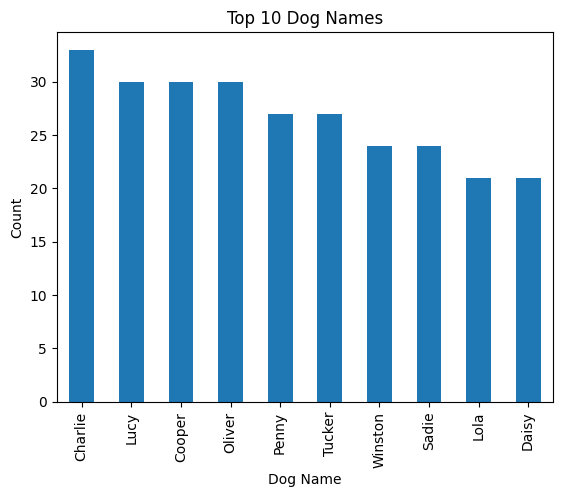

In [91]:
#Top 10 dog names
arch_img_master['name'].value_counts().nlargest(10).plot(kind = 'bar')
plt.xlabel('Dog Name')
plt.ylabel('Count')
plt.title("Top 10 Dog Names");

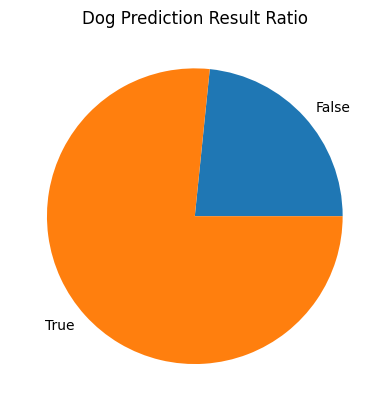

In [92]:
arch_img_master.groupby('breed').size().plot(kind = 'pie')

plt.title("Dog Prediction Result Ratio");

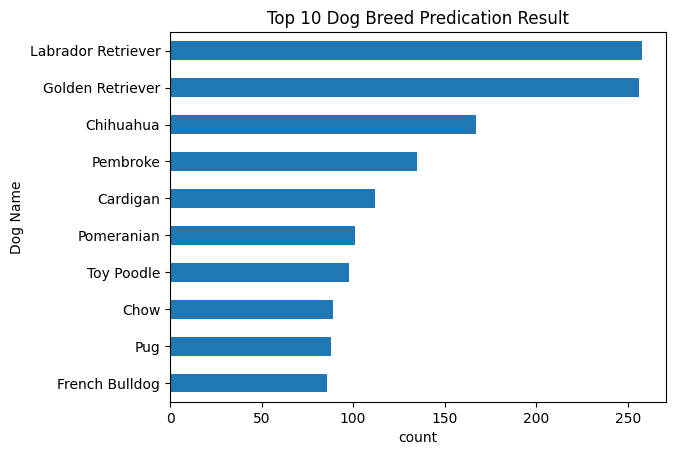

In [94]:
arch_img_master['prediction'].value_counts().nlargest(10).sort_values().plot(kind = 'barh');
plt.ylabel('Dog Name')
plt.xlabel('count')
plt.title('Top 10 Dog Breed Predication Result');

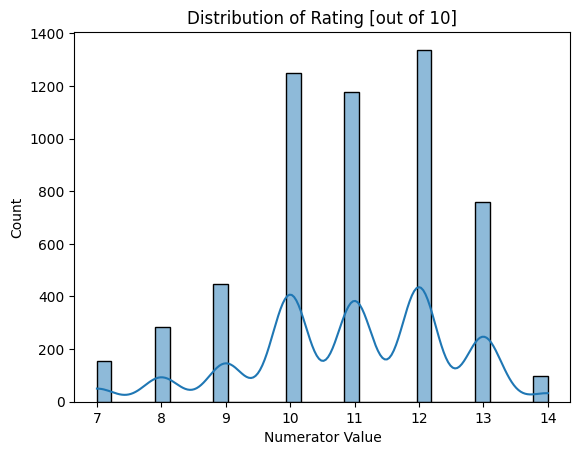

In [104]:
sns.histplot(arch_img_master['rating_numerator'], kde = True)
plt.title('Distribution of Rating [out of 10]')
plt.xlabel('Numerator Value');

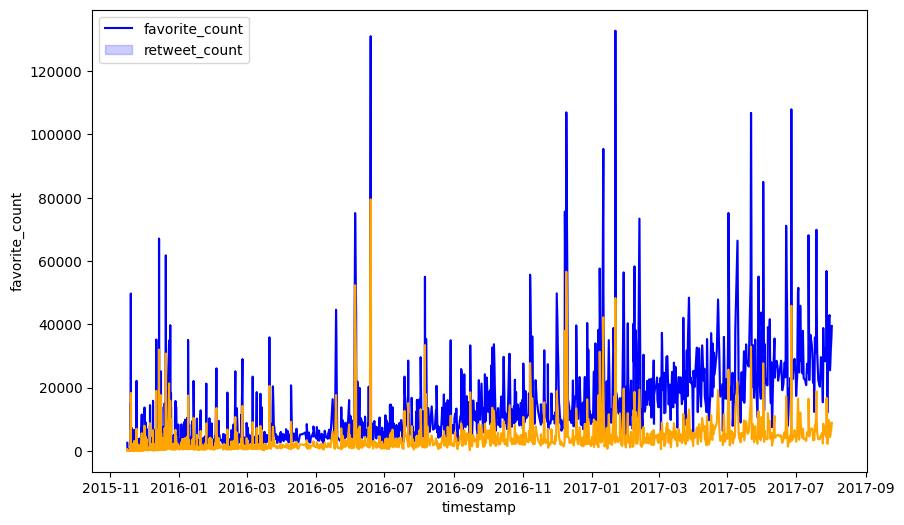

In [134]:
plt.figure(figsize = [10,6])
sns.lineplot(data = arch_img_master, x = 'timestamp', y = 'favorite_count', color = 'blue')
sns.lineplot(data = arch_img_master, x = 'timestamp', y = 'retweet_count' , color = 'orange')
plt.legend(['favorite_count', 'retweet_count'],loc=2);

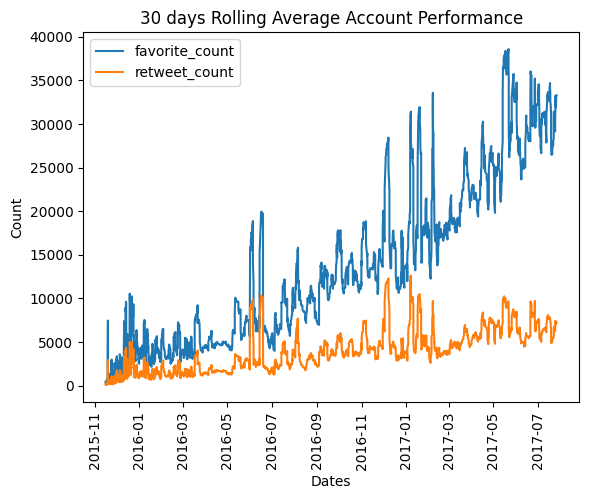

In [114]:
y1= arch_img_master.favorite_count.rolling(window = 30).mean()
# set a 30 days rolling average for retweet count
y2= arch_img_master.retweet_count.rolling(window = 30).mean()
x = arch_img_master.timestamp
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation = 90)
plt.title('30 days Rolling Average Account Performance')
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend(['favorite_count', 'retweet_count'],loc=2);

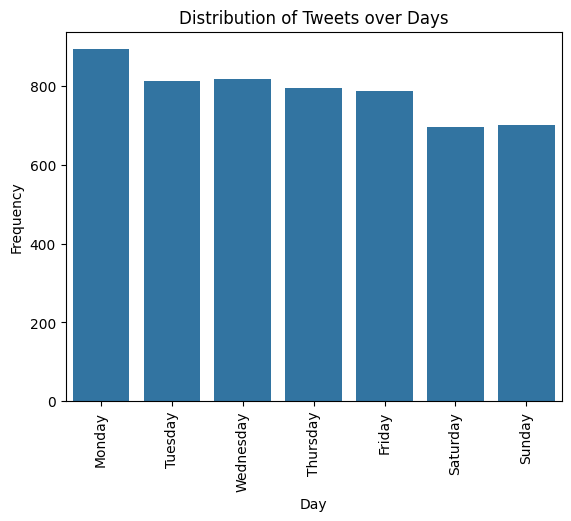

In [131]:
#extarct the day_name
arch_img_master['day'] = arch_img_master.timestamp.dt.day
arch_img_master['week_day'] = arch_img_master.timestamp.dt.dayofweek
arch_img_master['day_name'] = arch_img_master.timestamp.apply(lambda x: x.day_name())

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data = arch_img_master, x = 'day_name', order = day_order)
#arch_img_master.day_name.value_counts().plot(kind = 'bar',ordered = [1,2,3,4,5,6,0])
plt.title("Distribution of Tweets over Days")
plt.xlabel('Day')
plt.xticks(rotation = 90)
plt.ylabel('Frequency');
